In [34]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Jun 22 10:38:30 2021

@author: christian
"""
import mne 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

m = mne.channels.make_standard_montage('biosemi32') 
info = mne.create_info(
        ch_names=m.ch_names, sfreq=200., ch_types='eeg')
info.set_montage(m)

dmdmean_file = str(Path.cwd().parent / 'results_used'/ 'meanTask_modes.csv') 
df = pd.read_csv(dmdmean_file, index_col=0)
# df.drop(['trial'], axis = 1, inplace = True)
df['exnov']= np.array([1 if 'e' in lab else 0 for lab in df['part']])
df['label'] = df.index


df_e = df[df.exnov == 1]
df_n = df[df.exnov == 0]

e_str_t = df_e[df_e.label == 1].iloc[:,:32]
e_stl_t = df_e[df_e.label == 3].iloc[:,:32]
e_sinr_t = df_e[df_e.label == 2].iloc[:,:32]
e_sinl_t = df_e[df_e.label == 4].iloc[:,:32]
e_str_a = df_e[df_e.label == 1].iloc[:,32:64]
e_stl_a = df_e[df_e.label == 3].iloc[:,32:64]
e_sinr_a = df_e[df_e.label == 2].iloc[:,32:64]
e_sinl_a = df_e[df_e.label == 4].iloc[:,32:64]
e_str_b1 = df_e[df_e.label == 1].iloc[:,64:96]
e_stl_b1 = df_e[df_e.label == 3].iloc[:,64:96]
e_sinr_b1 = df_e[df_e.label == 2].iloc[:,64:96]
e_sinl_b1 = df_e[df_e.label == 4].iloc[:,64:96]
e_str_b2 = df_e[df_e.label == 1].iloc[:,96:128]
e_stl_b2 = df_e[df_e.label == 3].iloc[:,96:128]
e_sinr_b2 = df_e[df_e.label == 2].iloc[:,96:128]
e_sinl_b2 = df_e[df_e.label == 4].iloc[:,96:128]

n_str_t = df_n[df_n.label == 1].iloc[:,:32]
n_stl_t = df_n[df_n.label == 3].iloc[:,:32]
n_sinr_t = df_n[df_n.label == 2].iloc[:,:32]
n_sinl_t = df_n[df_n.label == 4].iloc[:,:32]
n_str_a = df_n[df_n.label == 1].iloc[:,32:64]
n_stl_a = df_n[df_n.label == 3].iloc[:,32:64]
n_sinr_a = df_n[df_n.label == 2].iloc[:,32:64]
n_sinl_a = df_n[df_n.label == 4].iloc[:,32:64]
n_str_b1 = df_n[df_n.label == 1].iloc[:,64:96]
n_stl_b1 = df_n[df_n.label == 3].iloc[:,64:96]
n_sinr_b1 = df_n[df_n.label == 2].iloc[:,64:96]
n_sinl_b1 = df_n[df_n.label == 4].iloc[:,64:96]
n_str_b2 = df_n[df_n.label == 1].iloc[:,96:128]
n_stl_b2 = df_n[df_n.label == 3].iloc[:,96:128]
n_sinr_b2 = df_n[df_n.label == 2].iloc[:,96:128]
n_sinl_b2 = df_n[df_n.label == 4].iloc[:,96:128]

from permute.core import two_sample
from statsmodels.stats.multitest import fdrcorrection
from mne import EvokedArray

p_th_stl = [] ; t_th_stl  = [] 
p_a_stl = [] ; t_a_stl  = [] 
p_b1_stl = [] ; t_b1_stl  = [] 
p_b2_stl = [] ; t_b2_stl  = [] 

p_th_str = [] ; t_th_str  = [] 
p_a_str = [] ; t_a_str = [] 
p_b1_str = [] ; t_b1_str  = [] 
p_b2_str = [] ; t_b2_str  = [] 

p_th_sinl = [] ; t_th_sinl  = [] 
p_a_sinl = [] ; t_a_sinl  = [] 
p_b1_sinl = [] ; t_b1_sinl  = [] 
p_b2_sinl = [] ; t_b2_sinl  = [] 

p_th_sinr = [] ; t_th_sinr  = [] 
p_a_sinr = [] ; t_a_sinr = [] 
p_b1_sinr = [] ; t_b1_sinr  = [] 
p_b2_sinr = [] ; t_b2_sinr  = [] 

for i in range(32):
    #steady right
    (p_, t_) = two_sample(e_str_t.values[:,i], n_str_t.values[:,i], reps = 1000, stat='t',alternative="two-sided", seed=4)
    p_th_str.append(p_); t_th_str.append(t_)   

    (p_, t_) = two_sample(e_str_a.values[:,i], n_str_a.values[:,i], reps = 1000, stat='t',alternative="two-sided", seed=4)
    p_a_str.append(p_); t_a_str.append(t_) 
    
    (p_, t_) = two_sample(e_str_b1.values[:,i], n_str_b1.values[:,i], reps = 1000, stat='t',alternative="two-sided", seed=4)
    p_b1_str.append(p_); t_b1_str.append(t_) 
    
    (p_, t_) = two_sample(e_str_b2.values[:,i], n_str_b2.values[:,i], reps = 1000, stat='t',alternative="two-sided", seed=4)
    p_b2_str.append(p_); t_b2_str.append(t_) 

    #steady left
    (p_, t_) = two_sample(e_stl_t.values[:,i], n_stl_t.values[:,i], reps = 1000, stat='t',alternative="two-sided", seed=4)
    p_th_stl.append(p_); t_th_stl.append(t_)   

    (p_, t_) = two_sample(e_stl_a.values[:,i], n_stl_a.values[:,i], reps = 1000, stat='t',alternative="two-sided", seed=4)
    p_a_stl.append(p_); t_a_stl.append(t_) 
    
    (p_, t_) = two_sample(e_stl_b1.values[:,i], n_stl_b1.values[:,i], reps = 1000, stat='t',alternative="two-sided", seed=4)
    p_b1_stl.append(p_); t_b1_stl.append(t_) 
    
    (p_, t_) = two_sample(e_stl_b2.values[:,i], n_stl_b2.values[:,i], reps = 1000, stat='t',alternative="two-sided", seed=4)
    p_b2_stl.append(p_); t_b2_stl.append(t_)     

    #sine right
    (p_, t_) = two_sample(e_sinr_t.values[:,i], n_sinr_t.values[:,i], reps = 1000, stat='t',alternative="two-sided", seed=4)
    p_th_sinr.append(p_); t_th_sinr.append(t_)   

    (p_, t_) = two_sample(e_sinr_a.values[:,i], n_sinr_a.values[:,i], reps = 1000, stat='t',alternative="two-sided", seed=4)
    p_a_sinr.append(p_); t_a_sinr.append(t_) 
    
    (p_, t_) = two_sample(e_sinr_b1.values[:,i], n_sinr_b1.values[:,i], reps = 1000, stat='t',alternative="two-sided", seed=4)
    p_b1_sinr.append(p_); t_b1_sinr.append(t_) 
    
    (p_, t_) = two_sample(e_sinr_b2.values[:,i], n_sinr_b2.values[:,i], reps = 1000, stat='t',alternative="two-sided", seed=4)
    p_b2_sinr.append(p_); t_b2_sinr.append(t_)   

    #sine right
    (p_, t_) = two_sample(e_sinl_t.values[:,i], n_sinl_t.values[:,i], reps = 1000, stat='t',alternative="two-sided", seed=4)
    p_th_sinl.append(p_); t_th_sinl.append(t_)   

    (p_, t_) = two_sample(e_sinl_a.values[:,i], n_sinl_a.values[:,i], reps = 1000, stat='t',alternative="two-sided", seed=4)
    p_a_sinl.append(p_); t_a_sinl.append(t_) 
    
    (p_, t_) = two_sample(e_sinl_b1.values[:,i], n_sinl_b1.values[:,i], reps = 1000, stat='t',alternative="two-sided", seed=4)
    p_b1_sinl.append(p_); t_b1_sinl.append(t_) 
    
    (p_, t_) = two_sample(e_sinl_b2.values[:,i], n_sinl_b2.values[:,i], reps = 1000, stat='t',alternative="two-sided", seed=4)
    p_b2_sinl.append(p_); t_b2_sinl.append(t_)   
    
p_str = np.r_[p_th_str,p_a_str,p_b1_str, p_b2_str]
p_stl = np.r_[p_th_stl,p_a_stl,p_b1_stl, p_b2_stl]
p_sinr = np.r_[p_th_sinr,p_a_sinr,p_b1_sinr, p_b2_sinr]
p_sinl = np.r_[p_th_sinl,p_a_sinl,p_b1_sinl, p_b2_sinl]
t_str = np.c_[t_th_str,t_a_str,t_b1_str, t_b2_str]
t_stl = np.c_[t_th_stl,t_a_stl,t_b1_stl, t_b2_stl]
t_sinr = np.c_[t_th_sinr,t_a_sinr,t_b1_sinr, t_b2_sinr]
t_sinl = np.c_[t_th_sinl,t_a_sinl,t_b1_sinl, t_b2_sinl]


_, p_corr = fdrcorrection(p_str)
p_str = p_corr
_, p_corr = fdrcorrection(p_stl)
p_stl = p_corr
_, p_corr = fdrcorrection(p_sinr)
p_sinr = p_corr    
_, p_corr = fdrcorrection(p_sinl)
p_sinl = p_corr

t_str = EvokedArray(t_str, info, tmin=0)
t_stl = EvokedArray(t_stl, info, tmin=0) 
t_sinr = EvokedArray(t_sinr, info, tmin=0)
t_sinl = EvokedArray(t_sinl, info, tmin=0)    

mask_str = p_str <= 0.05
mask_stl = p_stl <=0.05
mask_sinr = p_sinr <= 0.05
mask_sinl = p_sinl <=0.05

mask_str = np.reshape(mask_str, (32,4))
mask_stl = np.reshape(mask_stl, (32,4))
mask_sinr = np.reshape(mask_sinr, (32,4))
mask_sinl = np.reshape(mask_sinl, (32,4))


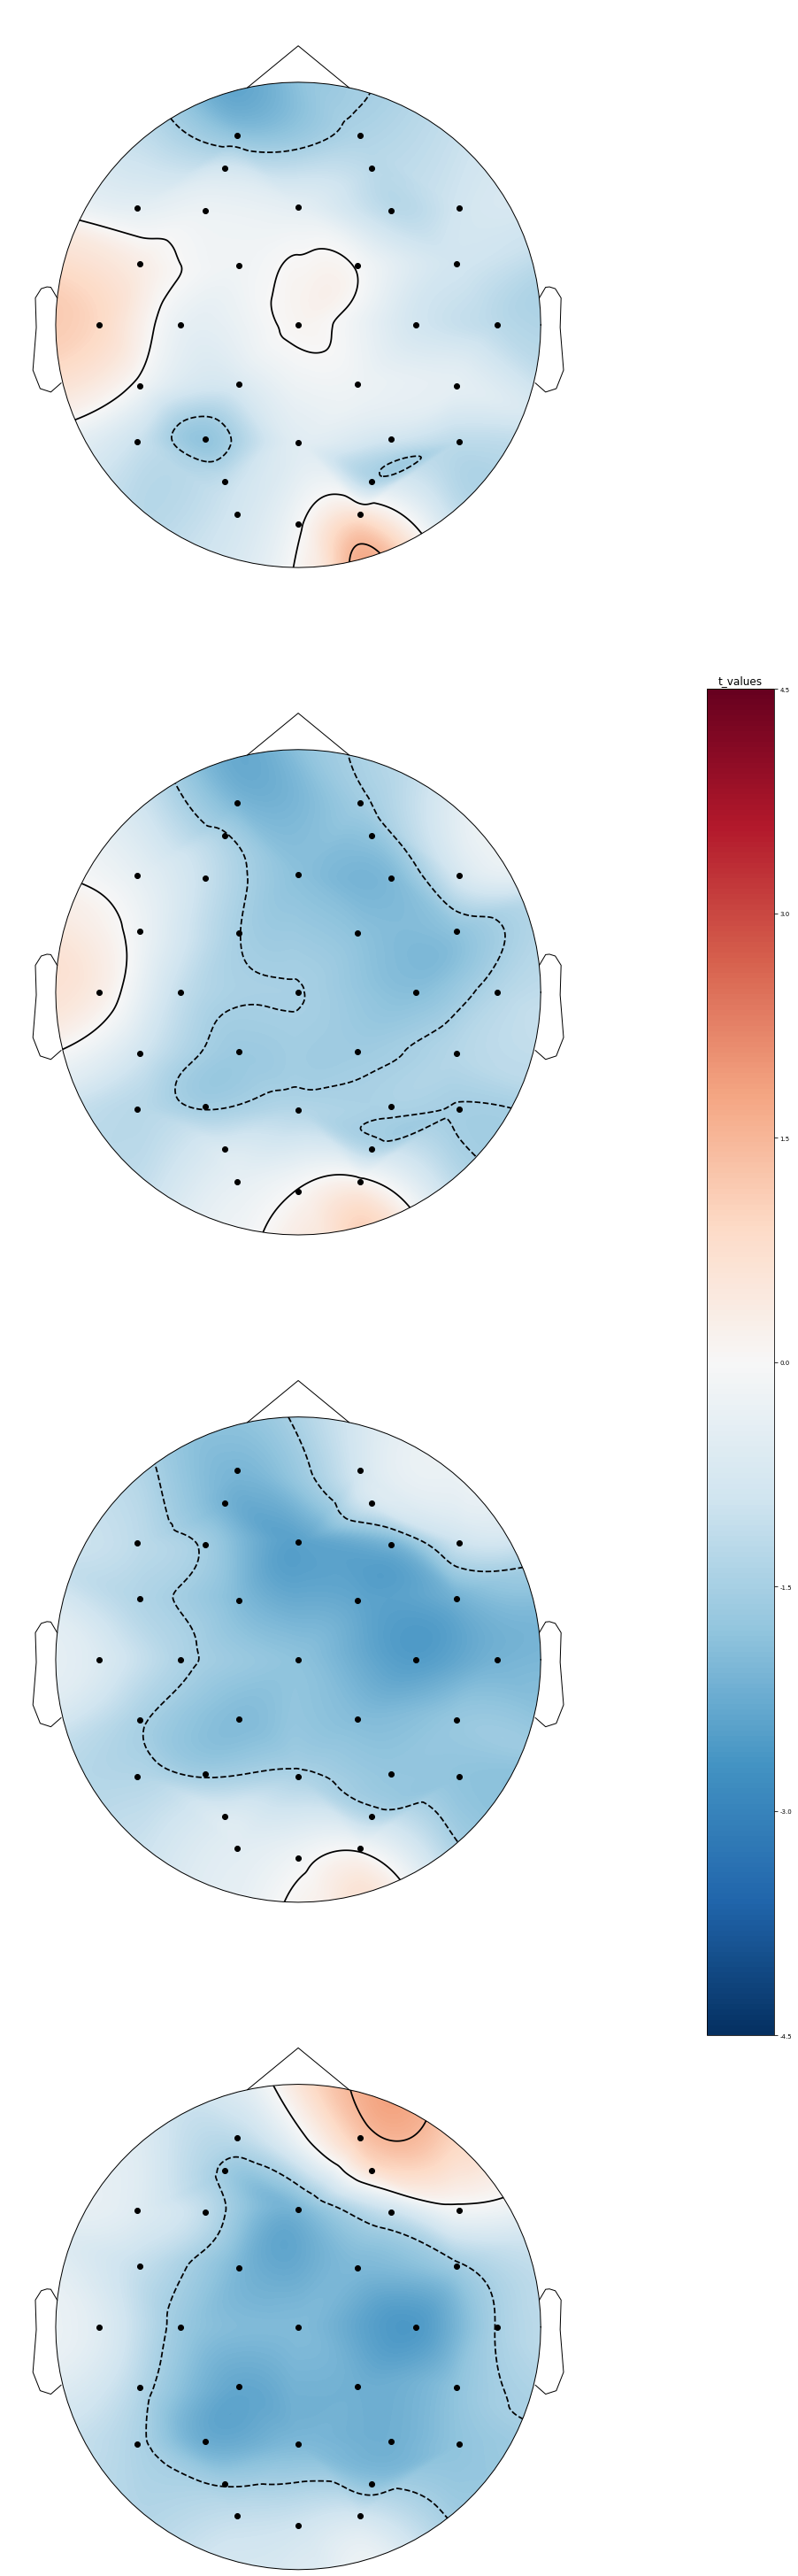

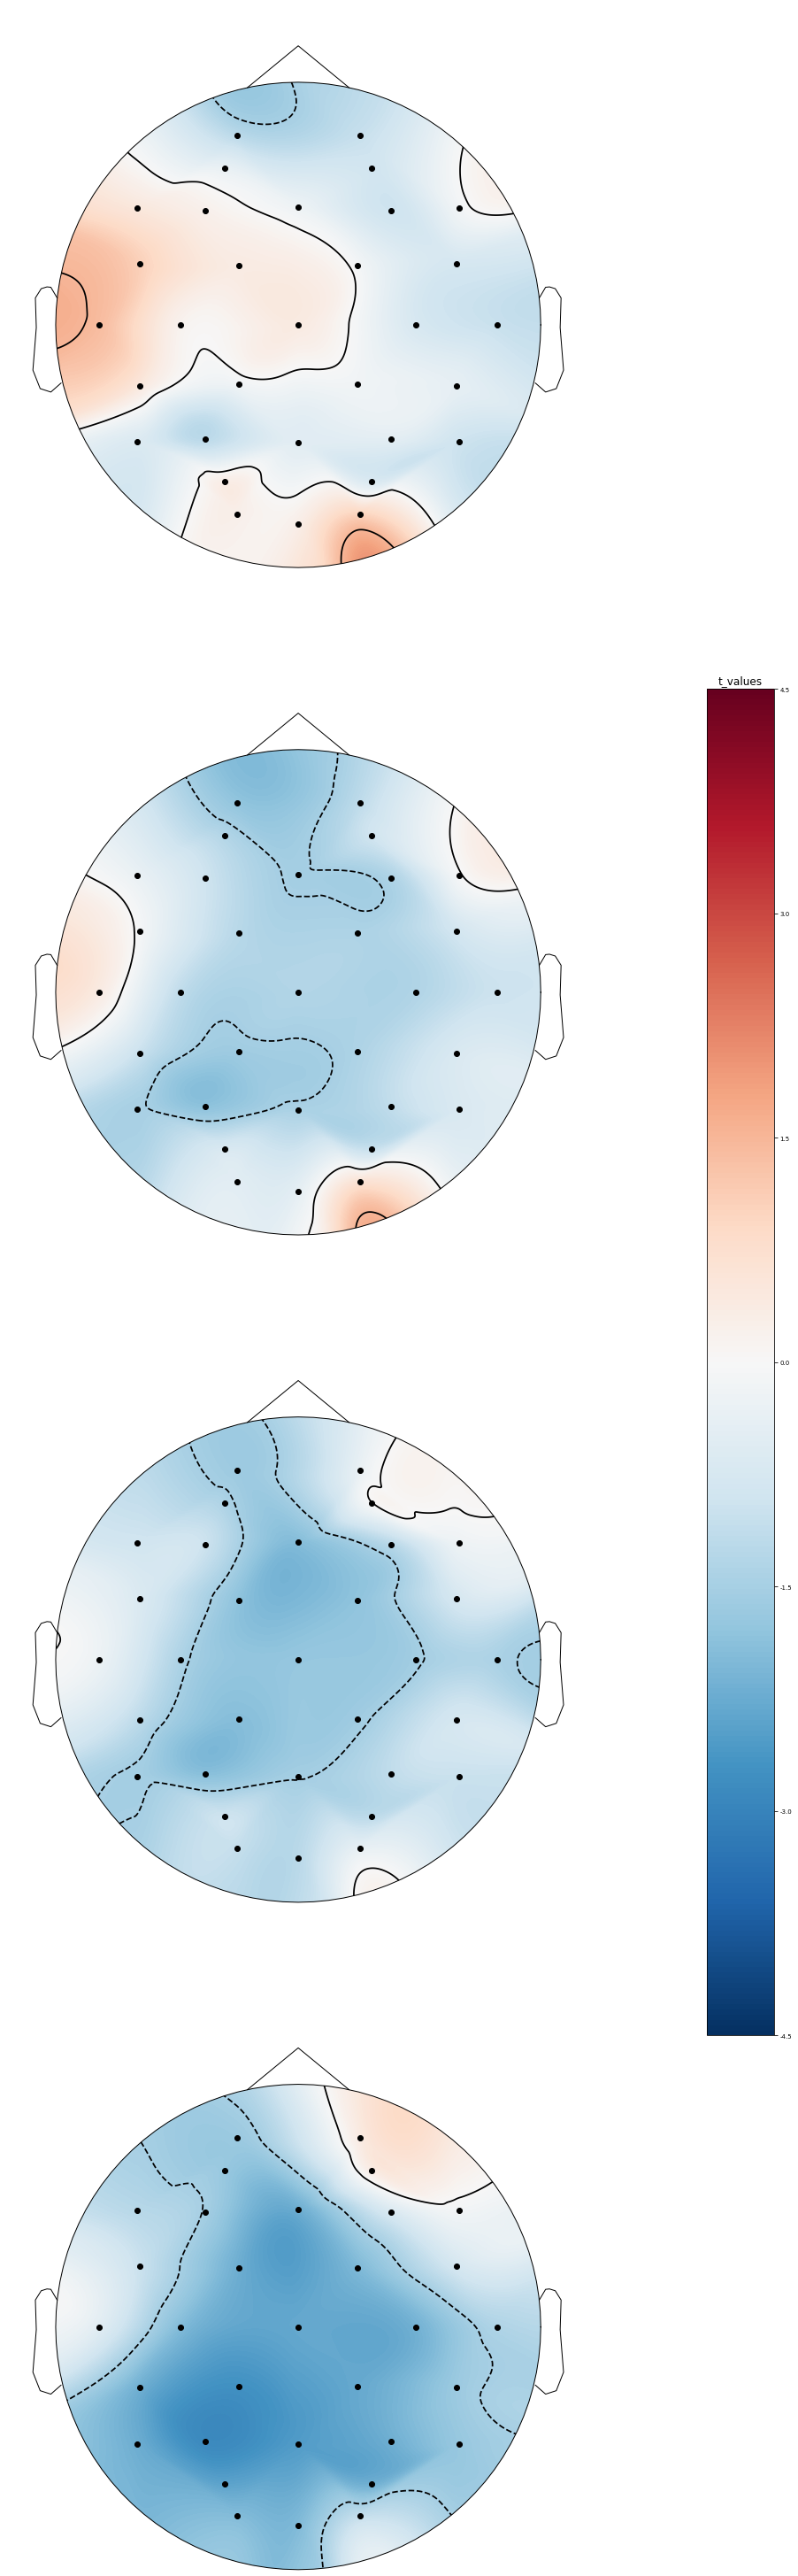

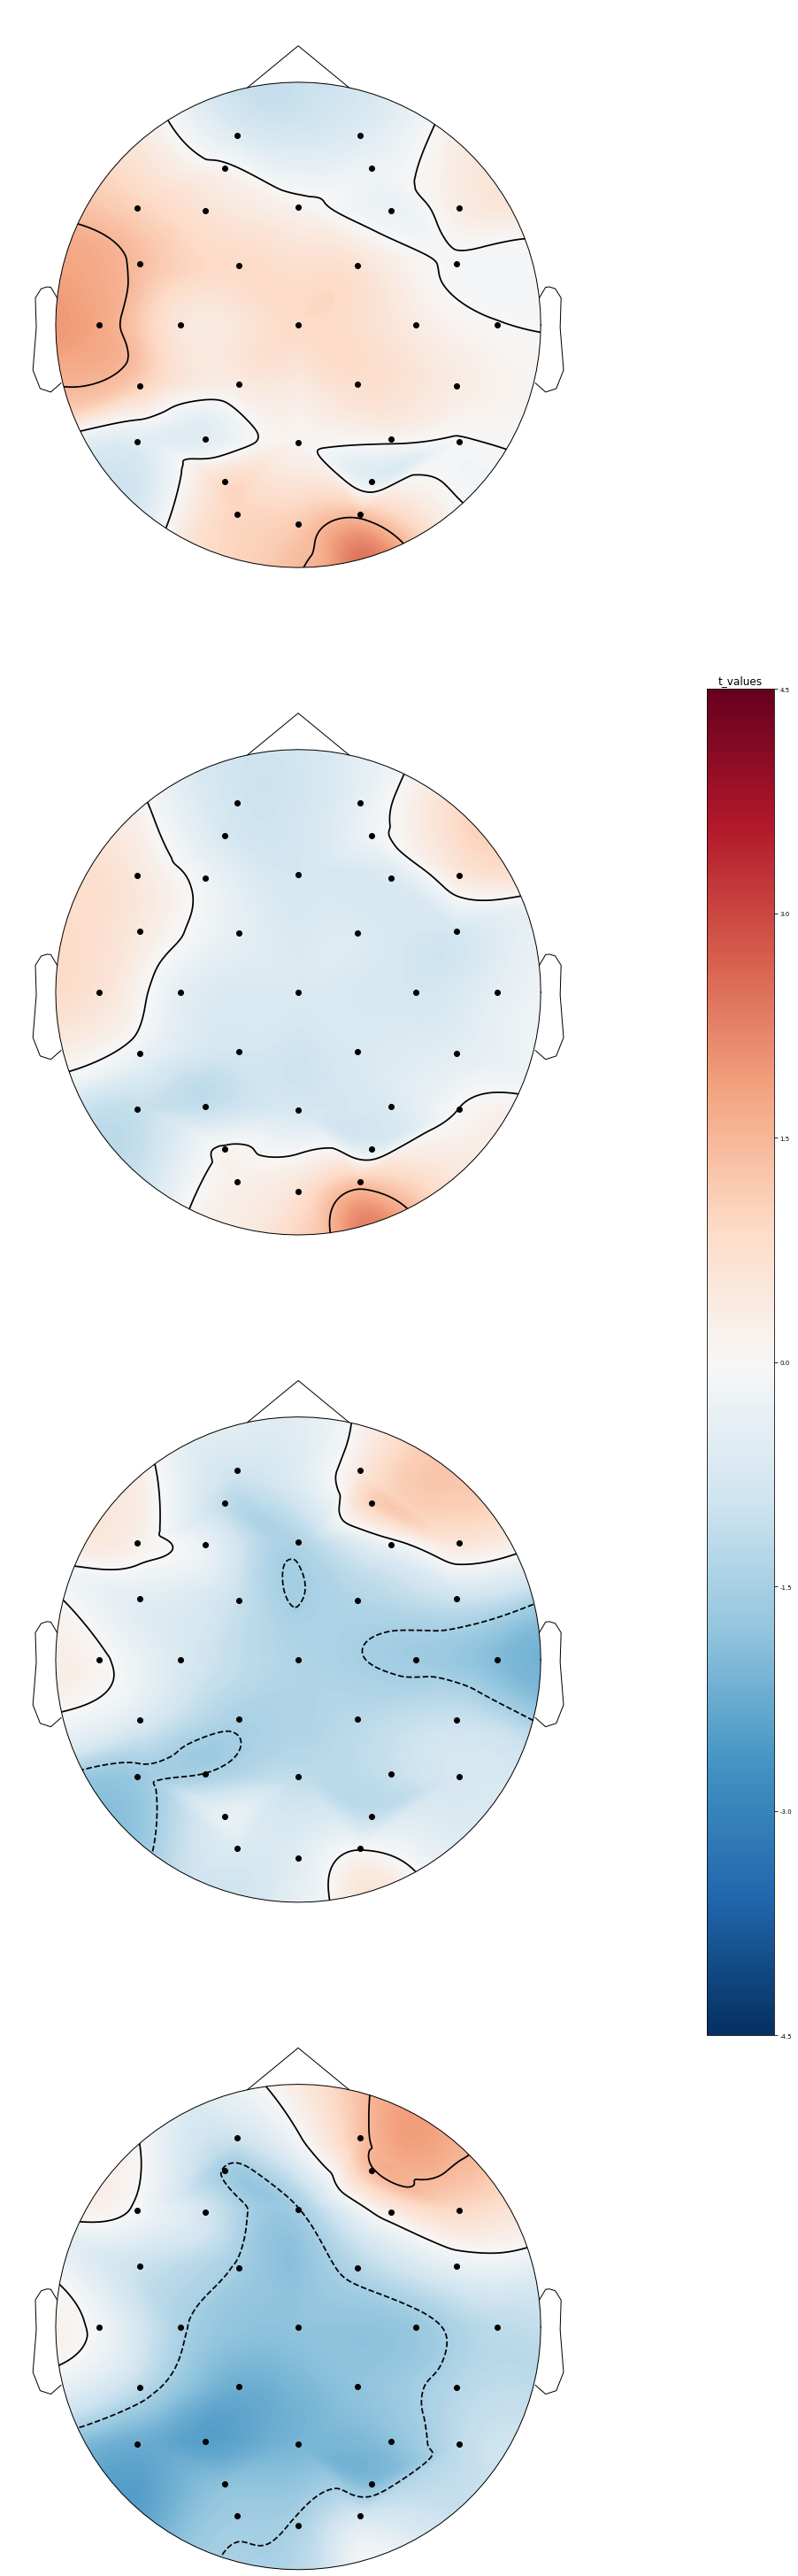

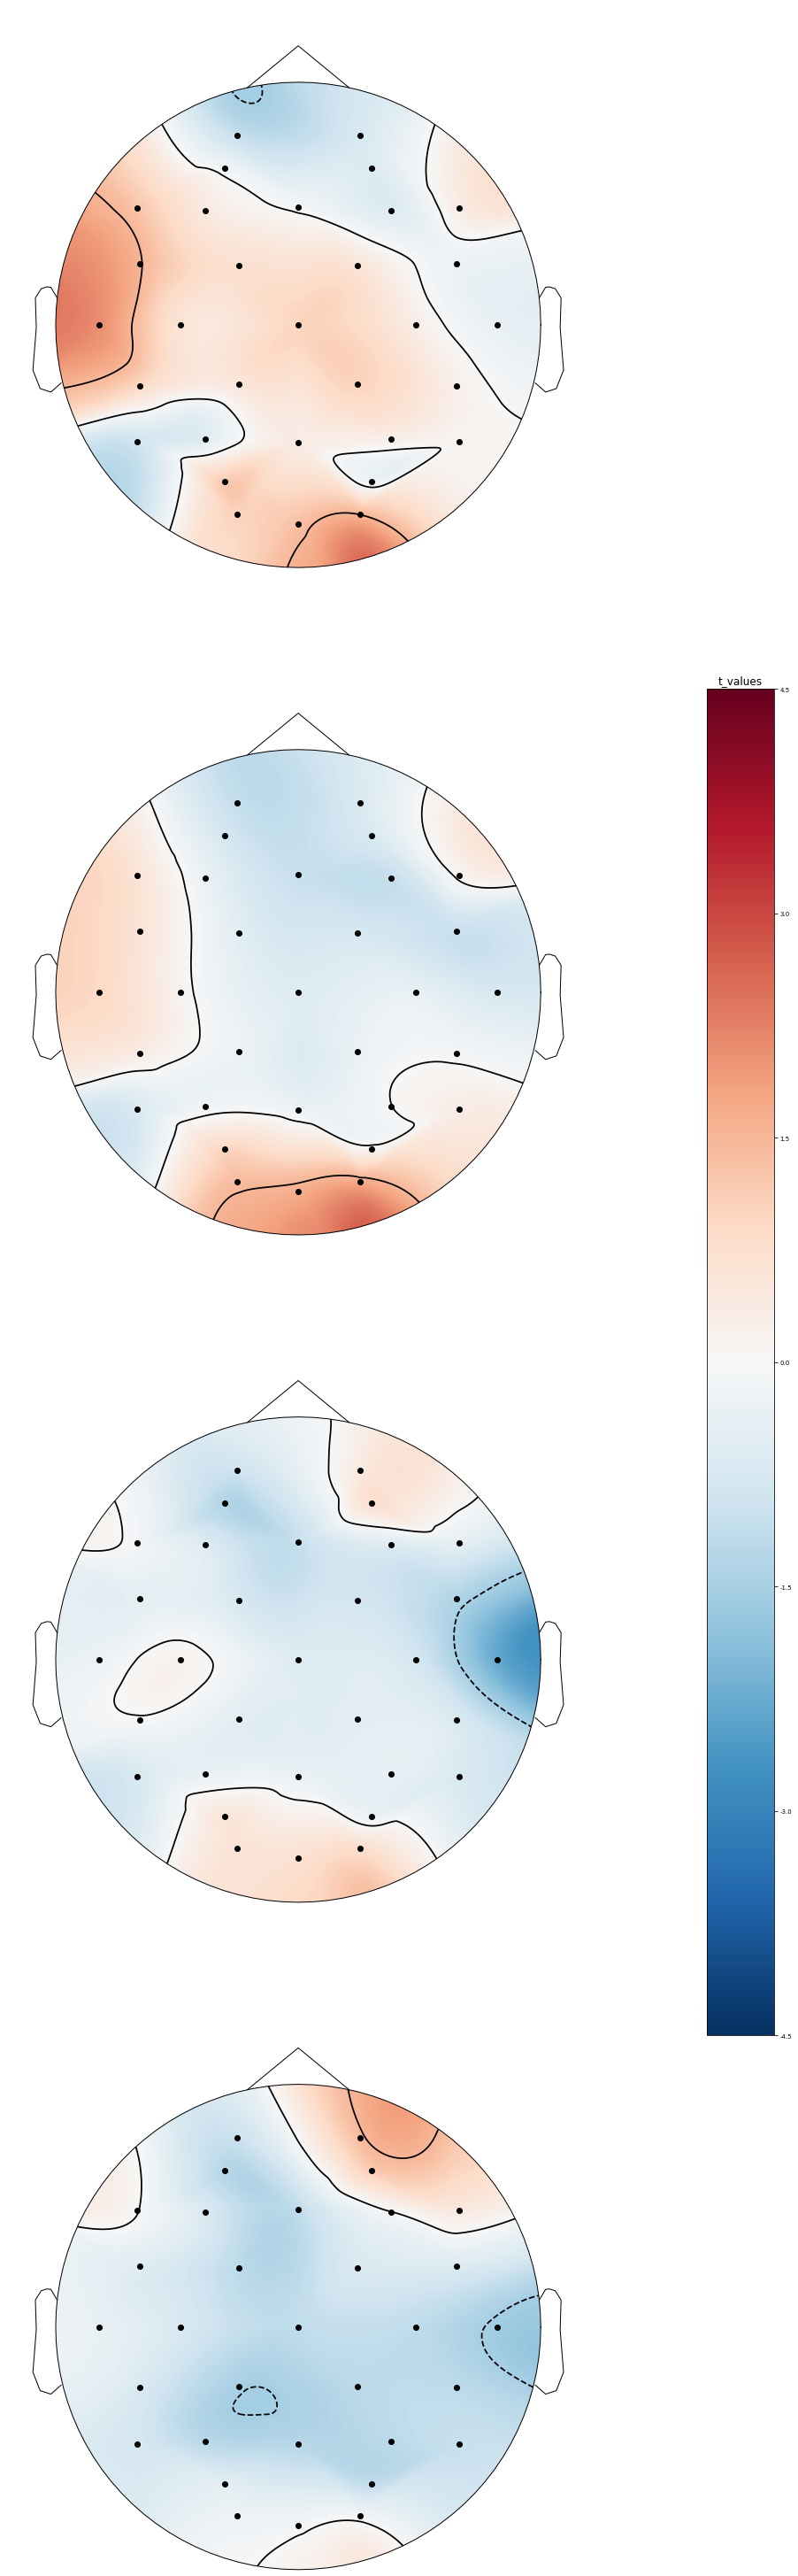

In [86]:
fig1 = t_str.plot_topomap(ch_type='eeg', scalings=1,
                    time_format=' ', vmin=-4.5, vmax=4.5,
                    units='t_values', mask=mask_str,
                    size=1,sensors = 'ko',
                    time_unit='s', title = None,  nrows = 4, res = 1000)
fig1.savefig('str.svg', dpi = 1000)

fig2 = t_sinr.plot_topomap(ch_type='eeg', scalings=1,
                    time_format=' ', vmin=-4.5, vmax=4.5,
                    units='t_values', mask=mask_sinr,
                    size=1,sensors = 'ko',
                    time_unit='s', title = None, nrows = 4, res = 1000)
fig2.savefig('sinr.svg')

fig3 = t_sinl.plot_topomap(ch_type='eeg', scalings=1,
                    time_format=' ', vmin=-4.5, vmax=4.5,
                    units='t_values', mask=mask_sinl,
                    size=1,sensors = 'ko',
                    time_unit='s', title = None, nrows = 4, res = 1000)
fig3.savefig('sinl.svg')

fig4 = t_stl.plot_topomap(ch_type='eeg', scalings=1,
                    time_format=' ', vmin=-4.5, vmax=4.5,
                    units='t_values', mask=mask_stl,
                    size=1,sensors = 'ko',
                    time_unit='s', title = None, nrows = 4, res = 1000)
fig4.savefig('stl.svg')                   

In [85]:
fig1.savefig('str.svg', dpi = 1000)